# Sprint 4: Find Structure



```
# This is formatted as code
```

## Colab Setup:


In [ ]:
# Display + plotting
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.3f}'.format

# Set up dataset (get from kagglehub)
import kagglehub
path = kagglehub.dataset_download("jiashenliu/515k-hotel-reviews-data-in-europe")
print("Path to dataset files:", path)

Using Colab cache for faster access to the '515k-hotel-reviews-data-in-europe' dataset.
Path to dataset files: /kaggle/input/515k-hotel-reviews-data-in-europe


In [ ]:
df = pd.read_csv(f"{path}/Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.700,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.900,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.700,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.500,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.700,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.100,"[' Leisure trip ', ' Family with young childre...",3 days,52.361,4.916
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.700,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.800,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.361,4.916
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.700,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.700,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.361,4.916


## Part A: Data Card (updated)

**Source & Link:** 515K Hotel Reviews Data in Europe (Kaggle) - https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe/data

**Shape:** 515,738 rows x 18 columns

**Time Coverage:** August 4, 2015 - August 3, 2017



##Column Dictionary:
- **Hotel_Address:** address of the hotel
- **Additional_Number_of_Scoring:** number of scores given without an accompanying review
- **Review_Date:** date when the review was posted
- **Average_Score:** average score of the hotel
- **Hotel_Name:** name of the hotel
- **Reviewer_Nationality:** nationality of the reviewer
- **Negative_Review:** text content of negative review, if the reviewer did not give a negative review it says "No Negative"
- **Review_Total_Negative_Word_Counts:** number of words in negative review
- **Total_Number_of_Reviews:** the total number of reviews
- **Positive_Review:** text content of positve reviews, if the reviewer did not give a positive review it says "No Positive"
- **Review_Total_Positive_Word_Counts:** number of words in positive review
- **Total_Number_of_Reviews_Reviewer_Has_Given:** number of reviews given by the reviewer
- **Reviewer_Score:** score given by the reviewer
- **Tags:** tags given to hotel by the reviewer                         
- **days_since_review:** days between date of review and the date it was scraped        
- **lat:** latitude of hotel
- **lng:** longitude of hotel

New Columns:
- **Hotel_Country:** country of the reviewed hotel
- **Year:** year when review was posted
- **Review_Total_Word_Counts:** the total word-counts derived from adding positive review word-counts and negative review word-counts




**Key ID Columns:** 'Hotel_Name', 'Review_Date'


##Missingness Snapshot:
N/A


##Quirks:
- **Hotel_Country** only includes 6 countries: Netherlands, UK, France, Spain, Italy, Austria


## B. Transformation


In [ ]:
# Add columns with "hotel_country", "Year"
df['Hotel_Address'] = df['Hotel_Address'].str.replace('United Kingdom', 'UK')
hotel_country = df['Hotel_Address'].str.split(' ').str[-1]
df['Hotel_Address'] = df.apply(lambda row: ' '.join(row['Hotel_Address'].split(' ')[:-1]), axis=1)

df['Hotel_Country'] = hotel_country

df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')
df['Year'] = df['Review_Date'].dt.year

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Year
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.700,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.900,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916,Netherlands,2017
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.700,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.500,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916,Netherlands,2017
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.700,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.100,"[' Leisure trip ', ' Family with young childre...",3 days,52.361,4.916,Netherlands,2017
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.700,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.800,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.361,4.916,Netherlands,2017
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-24,7.700,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.700,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.361,4.916,Netherlands,2017


In [ ]:
df['Review_Total_Word_Counts'] = df['Review_Total_Negative_Word_Counts'] + df['Review_Total_Positive_Word_Counts']
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Year,Review_Total_Word_Counts
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.700,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.900,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916,Netherlands,2017,408
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.700,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.500,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916,Netherlands,2017,105
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.700,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.100,"[' Leisure trip ', ' Family with young childre...",3 days,52.361,4.916,Netherlands,2017,63
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.700,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.800,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.361,4.916,Netherlands,2017,236
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-24,7.700,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.700,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.361,4.916,Netherlands,2017,148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

## Part C: Visuals

Our first visual will be a coorelation heatmap comparing the total number of words in a review with the review's score.

In [ ]:
#find the max and min number of words seen in reviews
max_words = df['Review_Total_Word_Counts'].max()
min_words = df['Review_Total_Word_Counts'].min()
print(max_words, min_words)

737 0


With the max and min word count of the reviews, we can now group the reviews into bins.

In [ ]:
#group the word counts into bins
df['Word_Count_Bins'] = pd.cut(
    df['Review_Total_Word_Counts'],
    bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750],
    right=True,
    include_lowest=True
)
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country,Year,Review_Total_Word_Counts,Word_Count_Bins
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.700,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,7,2.900,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916,Netherlands,2017,408,"(400.0, 450.0]"
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-08-03,7.700,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,7,7.500,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.361,4.916,Netherlands,2017,105,"(100.0, 150.0]"
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.700,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,9,7.100,"[' Leisure trip ', ' Family with young childre...",3 days,52.361,4.916,Netherlands,2017,63,"(50.0, 100.0]"
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-31,7.700,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,1,3.800,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.361,4.916,Netherlands,2017,236,"(200.0, 250.0]"
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,194,2017-07-24,7.700,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,3,6.700,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.361,4.916,Netherlands,2017,148,"(100.0, 150.0]"


With the bins, we can create the dataframe we want to pass into the heatmap.

In [ ]:
#create a dataframe which groups the reviews by their bins and score, recording the number of reviews which fall into each category
heatmap_data = df.groupby(['Word_Count_Bins', 'Reviewer_Score']).size().unstack()
heatmap_data

/tmp/ipython-input-726124944.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Word_Count_Bins', 'Reviewer_Score']).size().unstack()


Reviewer_Score,2.500,2.900,3.000,3.100,3.300,3.500,3.800,4.000,4.200,4.400,...,8.100,8.300,8.500,8.800,9.000,9.200,9.400,9.500,9.600,10.000
Word_Count_Bins,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 50.0]",1465,985,23,3,1702,62,2502,60,3221,9,...,34,32298,426,36630,539,46632,53,622,57938,98240
"(50.0, 100.0]",421,345,7,4,616,15,917,13,1150,2,...,4,6732,66,7523,79,9197,6,84,10302,13855
"(100.0, 150.0]",155,119,4,0,218,1,323,7,393,0,...,0,1419,13,1563,23,1897,2,13,2006,2604
"(150.0, 200.0]",73,62,3,1,97,1,154,3,180,1,...,0,402,2,446,5,544,2,3,586,696
"(200.0, 250.0]",30,33,0,0,59,0,55,0,57,0,...,0,138,1,147,0,196,0,2,168,255
"(250.0, 300.0]",13,15,0,0,30,0,26,0,35,0,...,0,60,0,61,0,55,0,0,86,100
"(300.0, 350.0]",14,11,0,0,20,0,23,0,24,0,...,0,37,0,29,0,33,0,0,33,54
"(350.0, 400.0]",21,14,0,0,23,0,34,1,27,0,...,1,20,0,13,1,20,0,0,32,35
"(400.0, 450.0]",6,4,0,0,5,0,7,0,8,0,...,0,15,0,6,0,3,0,0,7,11


Now we can create the heatmap.

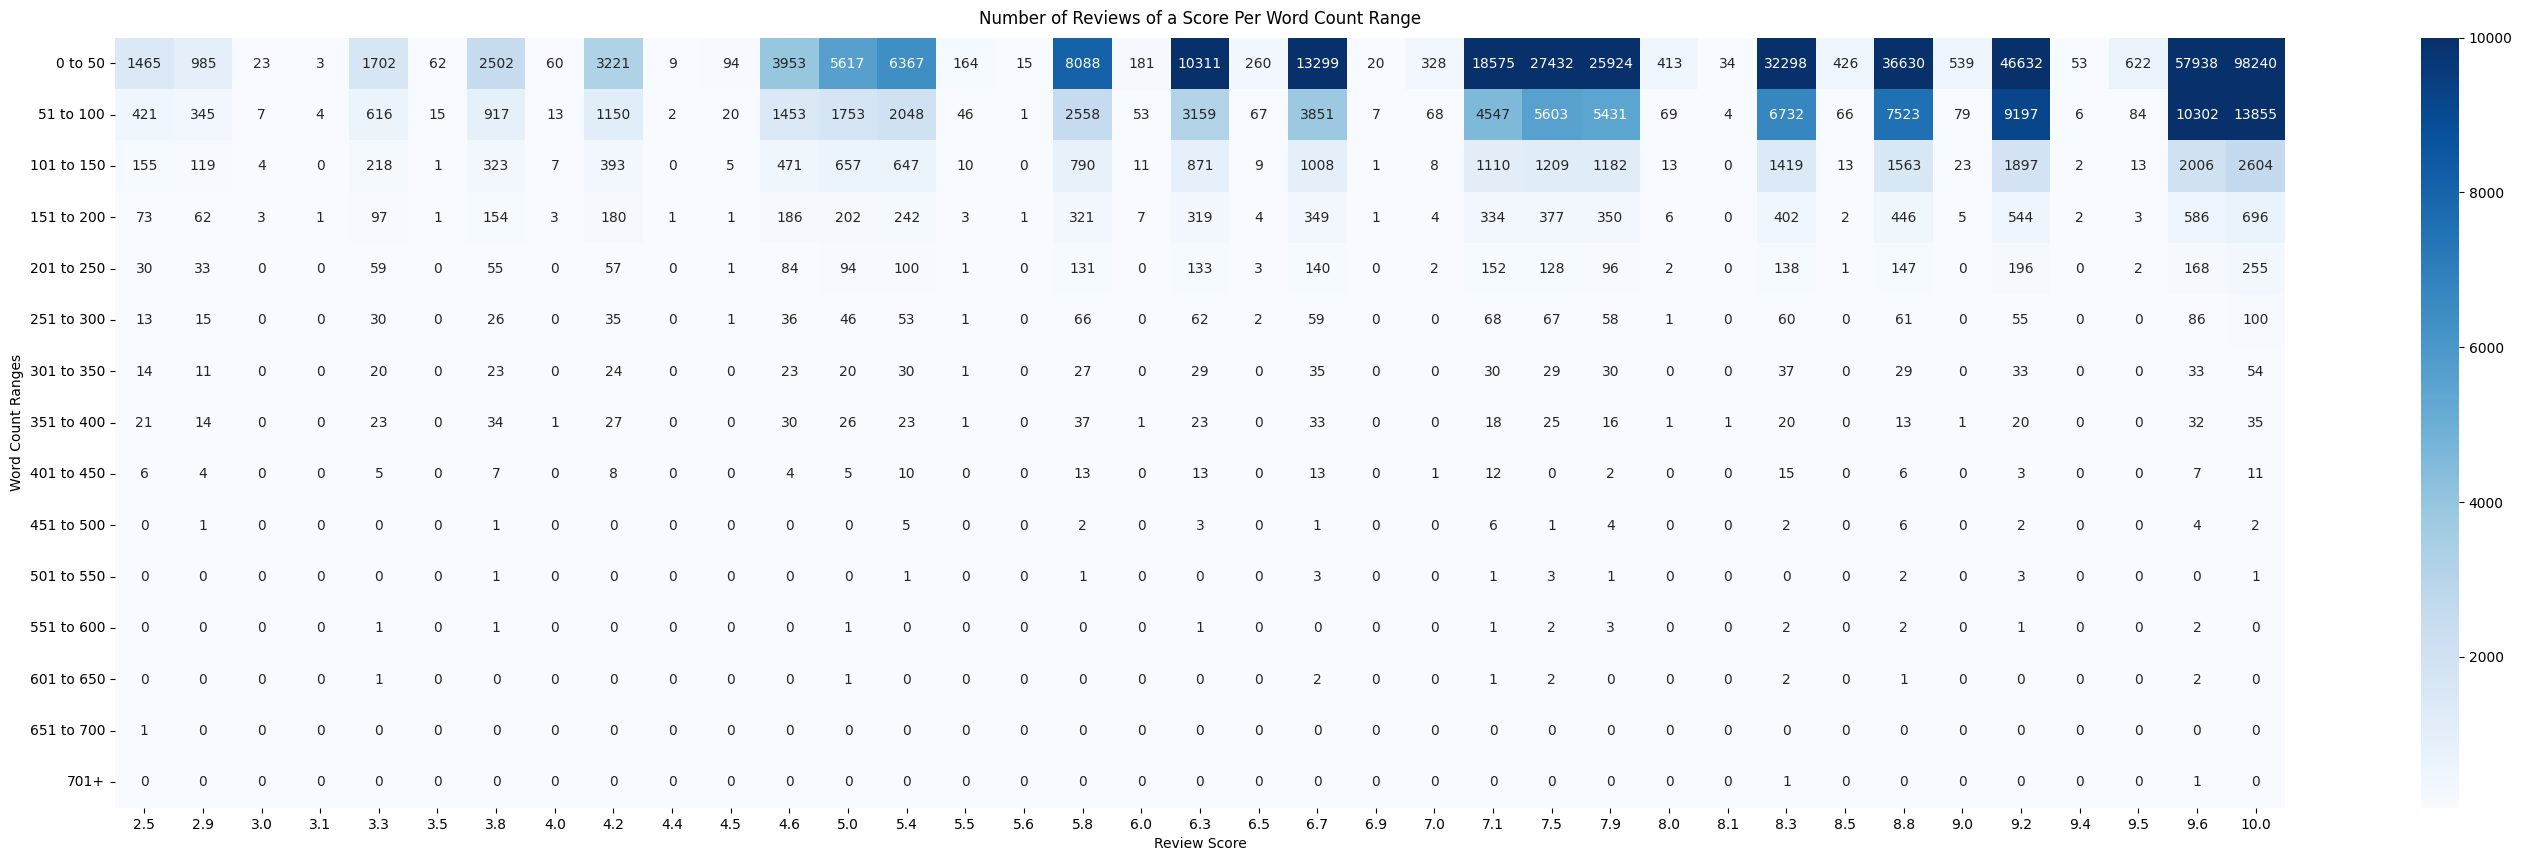

In [ ]:
plt.figure(figsize=(35, 10))
sns.heatmap(
    heatmap_data,
    cmap = 'Blues',
    annot = True,
    fmt='',
    vmin = 50,
    vmax = 10000
)
#manually name the y axis ticks
y_ticks = ['0 to 50', '51 to 100',
            '101 to 150', '151 to 200',
            '201 to 250', '251 to 300',
            '301 to 350', '351 to 400',
            '401 to 450', '451 to 500',
            '501 to 550', '551 to 600',
            '601 to 650', '651 to 700',
            '701+']
plt.title('Number of Reviews of a Score Per Word Count Range', pad = 10)
plt.ylabel('Word Count Ranges')
plt.xlabel('Review Score')
plt.yticks(
    ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5],
    labels=y_ticks
)
plt.show()

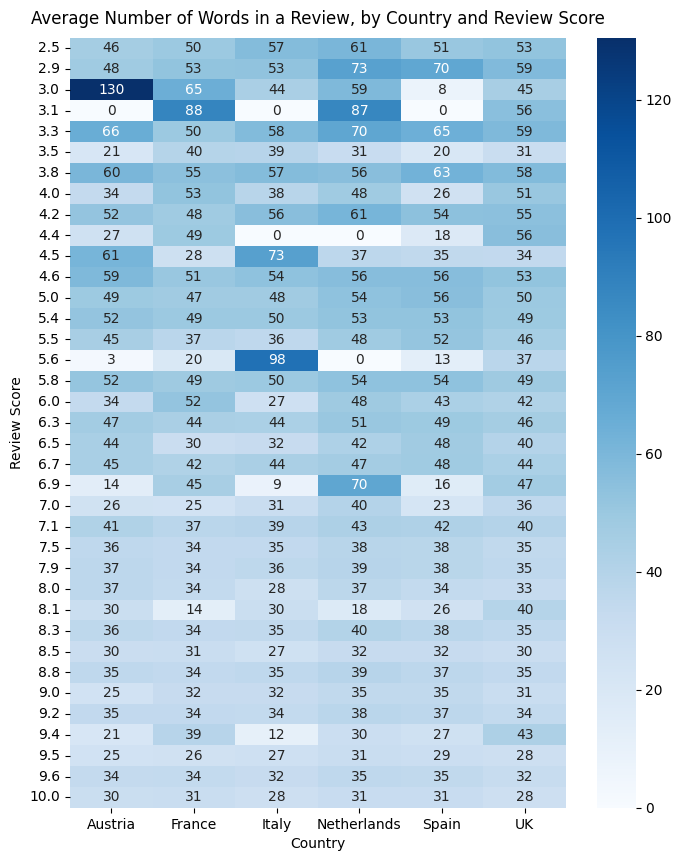

In [ ]:
average_words = df.pivot_table(
    values='Review_Total_Word_Counts',
    index='Reviewer_Score',
    columns='Hotel_Country',
    aggfunc='mean'
)
average_words.fillna(0, inplace=True)

plt.figure(figsize=(8, 10))
sns.heatmap(
    average_words,
    annot=True,
    fmt='.0f',
    cmap='Blues'
)
plt.title('Average Number of Words in a Review, by Country and Review Score', pad = 10)
plt.ylabel('Review Score')
plt.xlabel('Country')
plt.show()


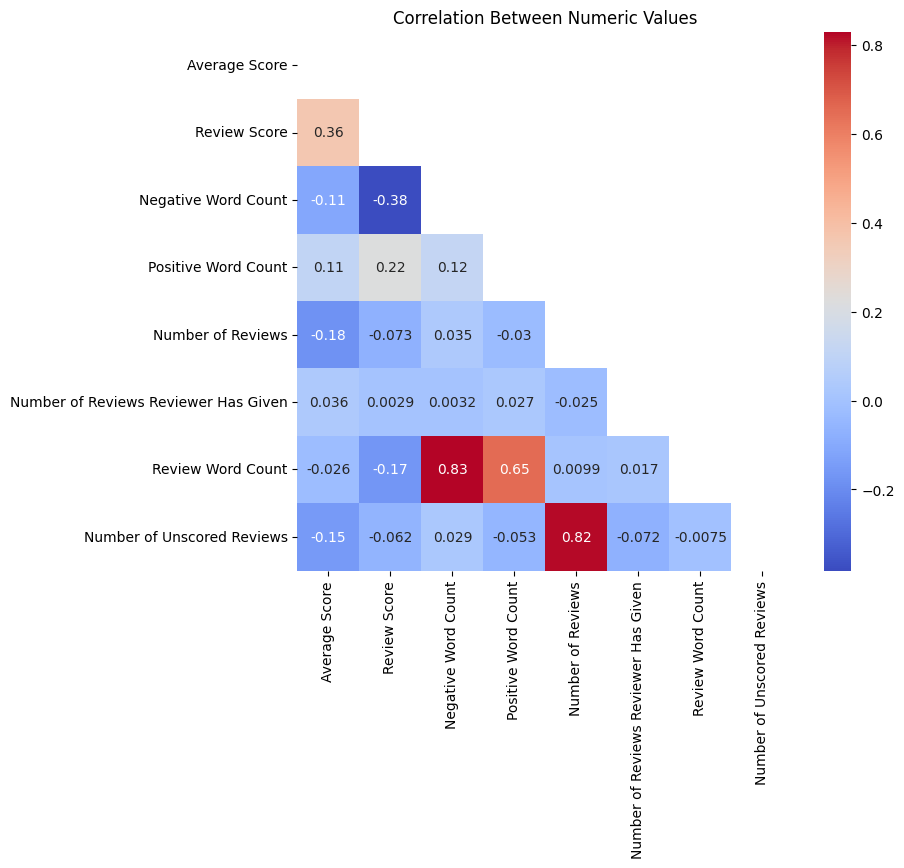

In [ ]:
numeric_cols = [
    'Average_Score', 'Reviewer_Score', 'Review_Total_Negative_Word_Counts',
    'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews',
    'Total_Number_of_Reviews_Reviewer_Has_Given', 'Review_Total_Word_Counts',
    'Additional_Number_of_Scoring'
]
# must be Reviewer Score and not Review Score
new_labels = [
    'Average Score', 'Review Score', 'Negative Word Count',
    'Positive Word Count', 'Number of Reviews',
    'Number of Reviews Reviewer Has Given', 'Review Word Count',
    'Number of Unscored Reviews'
]


corr = df[numeric_cols].corr()
corr.columns = new_labels
corr.index = new_labels

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 7))

sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Values')
plt.show()

In [ ]:
df_for_plot = df.copy()

df_for_plot['days_since_review'] = df_for_plot.apply(lambda row: int(row['days_since_review'].split(' ')[0]), axis = 1)
df_for_plot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

In [ ]:
df_for_plot = df_for_plot.drop(['Year','Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'Hotel_Country', 'Word_Count_Bins', 'lat', 'lng'], axis=1)
df_for_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 3   Total_Number_of_Reviews                     515738 non-null  int64  
 4   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 6   Reviewer_Score                              515738 non-null  float64
 7   days_since_review                           515738 non-null  int64  
 8   Review_Total_Word_Counts                    515738 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 35.4 MB


In [ ]:
df_for_plot = df_for_plot.rename(columns = {'Additional_Number_of_Scoring': 'num_of_unscored_rev',
                                            'Average_Score': 'avg_score',
                                            'Review_Total_Negative_Word_Counts': 'neg_word_count',
                                            'Total_Number_of_Reviews': 'num_of_rev',
                                            'Review_Total_Positive_Word_Counts': 'pos_word_count',
                                            'Total_Number_of_Reviews_Reviewer_Has_Given': 'num_of_rev_by_reviewer',
                                            'Reviewer_Score': 'revr_score',
                                            'days_since_review': 'days_since_rev',
                                            'Review_Total_Word_Counts': 'rev_word_count'
                                            })

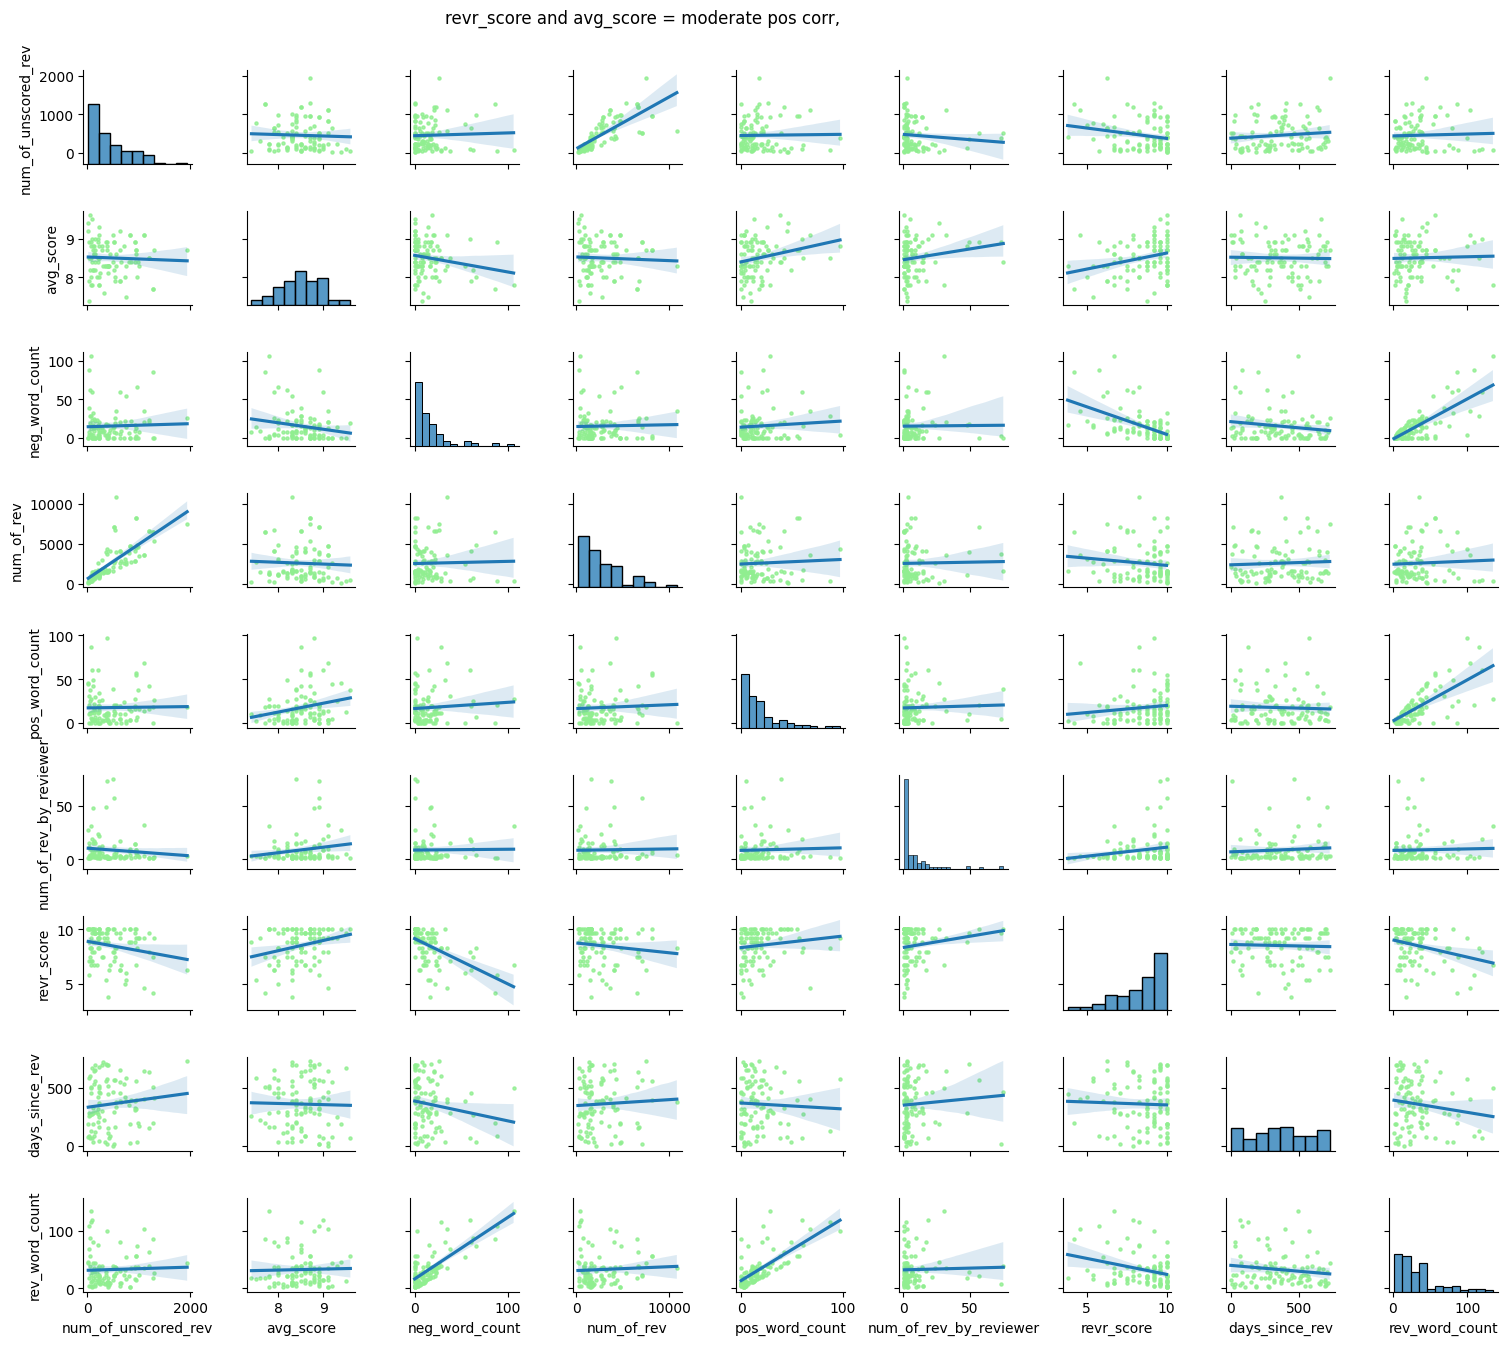

In [ ]:
g = sns.pairplot(
     data = df_for_plot.sample(100),
     kind="reg", # regression
     plot_kws={"scatter_kws":{"color":"lightgreen", "s":5}},
     height=1.5,
     aspect=1.3
     );
g.fig.suptitle(
    "revr_score and avg_score = moderate pos corr", y=1.03
);

g.fig.subplots_adjust(left=0.18, bottom=0.08, wspace=0.5, hspace=0.5)

plt.show()

Light Quantification

Reviewer Score and Average Score

This is a moderate positive correlation. It indicates a tendency for hotels with higher average scores to also receive higher individual reviewer scores, but it's not a very strong relationship.

In [ ]:
target_corr = df_for_plot.corrwith(df_for_plot["revr_score"], numeric_only=True)

target_corr

#light quantification
# 1. Positive Word Count and Review Word Count = 0.652
# 2. Number of Reviews and Number of Unscored Reviews = 0.825
# 3. Review Word Count and Negative Word Count = 0.831
# 4. Number of Unscored Reviews and Number of Reviews = 0.825
# 5. Average Score and Review Score = 0.364

,0
num_of_unscored_rev,-0.062
avg_score,0.364
neg_word_count,-0.382
num_of_rev,-0.073
pos_word_count,0.221
num_of_rev_by_reviewer,0.003
revr_score,1.000
days_since_rev,0.003
rev_word_count,-0.168
